# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...


In [11]:
import os
import pandas as pd

# Make sure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Save the reviews to a CSV
df = pd.DataFrame(reviews, columns=["Review"])
df.to_csv("data/british_airways_reviews.csv", index=False)
print("File saved successfully.")

File saved successfully.


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Cleaning

In [16]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Load data
df = pd.read_csv("data/british_airways_reviews.csv")

# Define stopwords set
stop_words = set(stopwords.words('english'))

# Define cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text.strip()

# Apply cleaning
df["Cleaned"] = df["Review"].apply(clean_text)

# Save the cleaned reviews
df.to_csv("data/british_airways_reviews_cleaned.csv", index=False)
print("Cleaned data saved.")

Cleaned data saved.


# Sentiment Analysis

In [26]:
from textblob import TextBlob

# Compute polarity
df["Polarity"] = df["Cleaned"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify into sentiment categories
def get_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Polarity"].apply(get_sentiment)

# Save result
df.to_csv("data/british_airways_reviews_sentiment.csv", index=False)
df["Sentiment"].value_counts()

Sentiment
Neutral     420
Positive    400
Negative    180
Name: count, dtype: int64

# Visualize the Insights

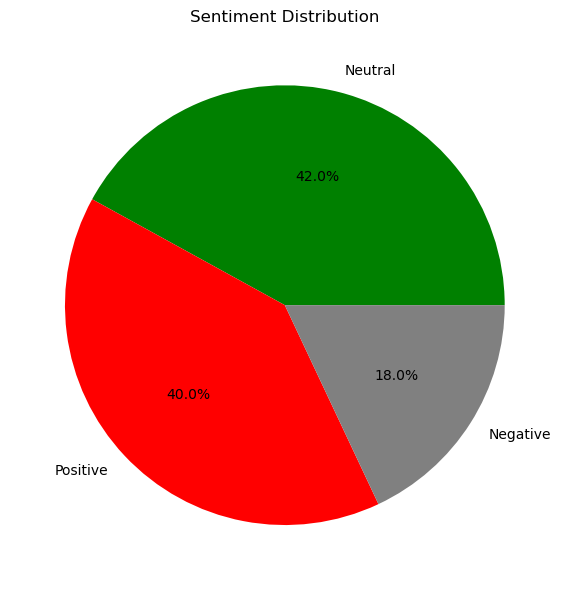

In [28]:
import matplotlib.pyplot as plt

sentiment_counts = df["Sentiment"].value_counts()

plt.figure(figsize=(6, 6))
sentiment_counts.plot.pie(autopct="%1.1f%%", colors=["green", "red", "gray"], title="Sentiment Distribution")
plt.ylabel("")  # removes y-axis label
plt.tight_layout()
plt.savefig("data/sentiment_pie_chart.png")
plt.show()

# Word Cloud (Common Words in Reviews)

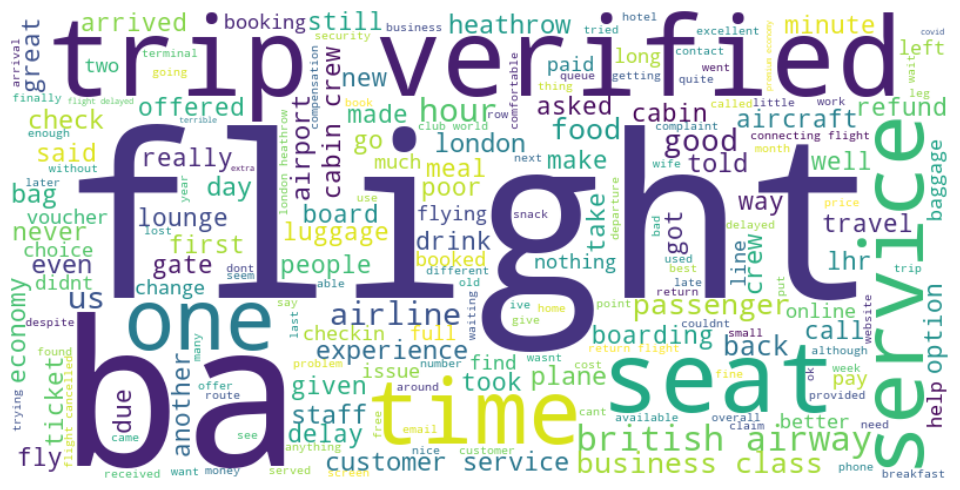

In [34]:
from wordcloud import WordCloud

text = " ".join(df["Cleaned"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig("data/wordcloud.png")
plt.show()